In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('seaborn')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [16]:
y = train['SalePrice']

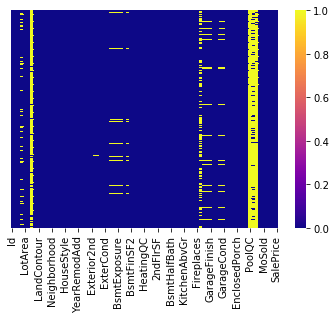

In [33]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='plasma')

In [30]:
train.isnull().sum().sort_values(ascending=False)[0:19]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [31]:
test.isnull().sum().sort_values(ascending=False)[0:33]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [34]:
columns = ['Alley', 'MiscFeature', 'Fence', 'GarageYrBlt']

train.drop(columns=columns, inplace=True)
test.drop(columns=columns, inplace=True)
train['PoolQC'] = train['PoolQC'].fillna('None')
test['PoolQC'] = test['PoolQC'].fillna('None')

train.drop(columns=['Id'], inplace=True)

In [35]:
# Imputing Mean for numerical columns 

columns = ['LotFrontage', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea']

for item in columns:
    train[item] = train[item].fillna(train[item].mean())
    test[item] = test[item].fillna(test[item].mean())

In [37]:
# Imputing Mode for categorical columns

columns = ['BsmtCond', 'BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'MSZoning',
           'MasVnrType', 'MasVnrArea', 'BsmtExposure','BsmtFinType2', 'BsmtFinType1', 'Electrical',  'Utilities',
           'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 'Exterior1st', 'KitchenQual']

for item in columns:
    train[item] = train[item].fillna(train[item].mode()[0])
    test[item] = test[item].fillna(test[item].mode()[0])

In [66]:
# Check for any remaining null values

train.isnull().any().any() , test.isnull().any().any()

(False, False)

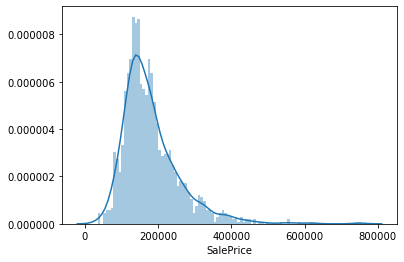

In [71]:
## Add legends, Add axis labels, Change theme

sns.distplot(train['SalePrice'], bins=100)

In [72]:
# Get only numeric features

df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [78]:
# Get correlation of every column with respect to SalePrice(target)

df_num_corr = df_num.corr()['SalePrice'][:-1]

In [83]:
# Sort base on highly correlated features 

feature_list = df_num_corr[abs(df_num_corr) >= 0].sort_values(ascending=False)

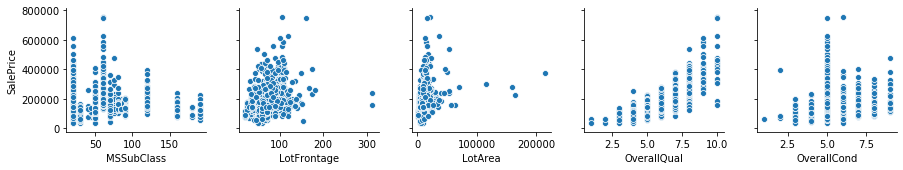

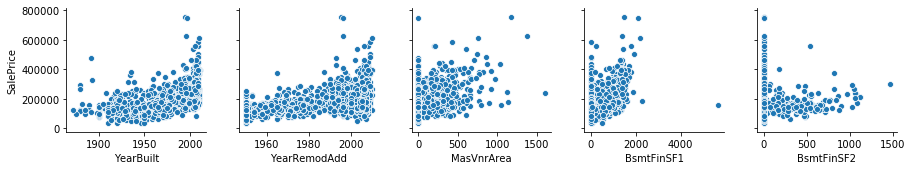

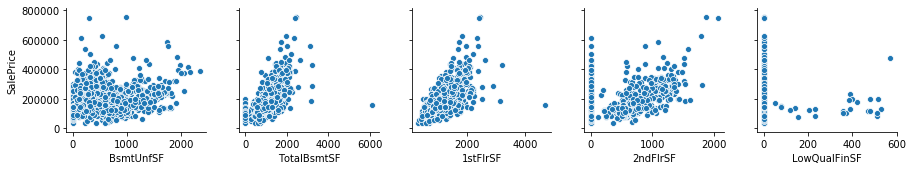

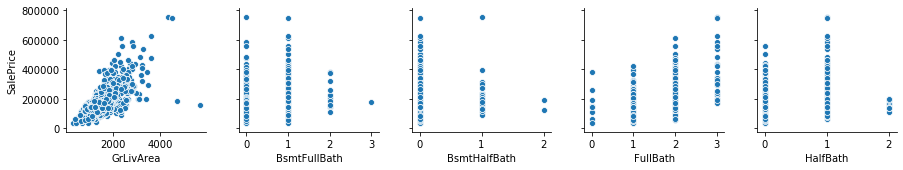

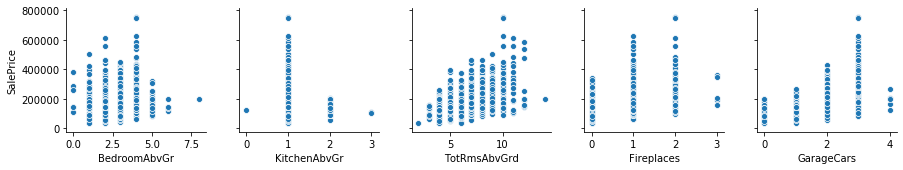

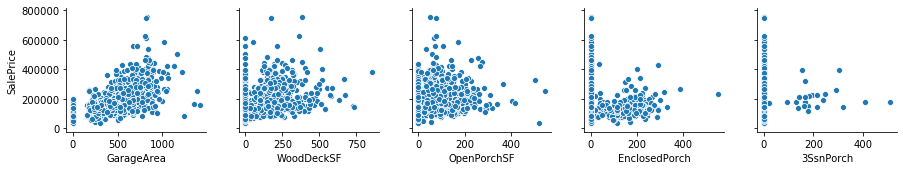

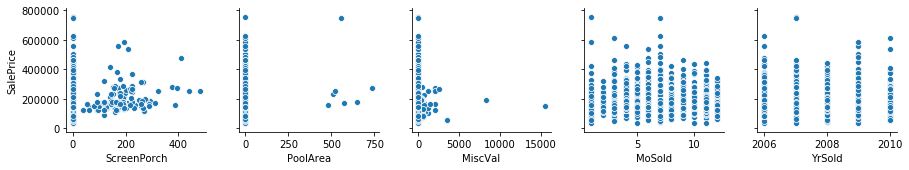

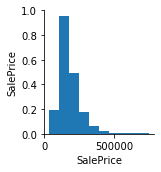

In [85]:
# Plotting all numerical features vs SalePrice

for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

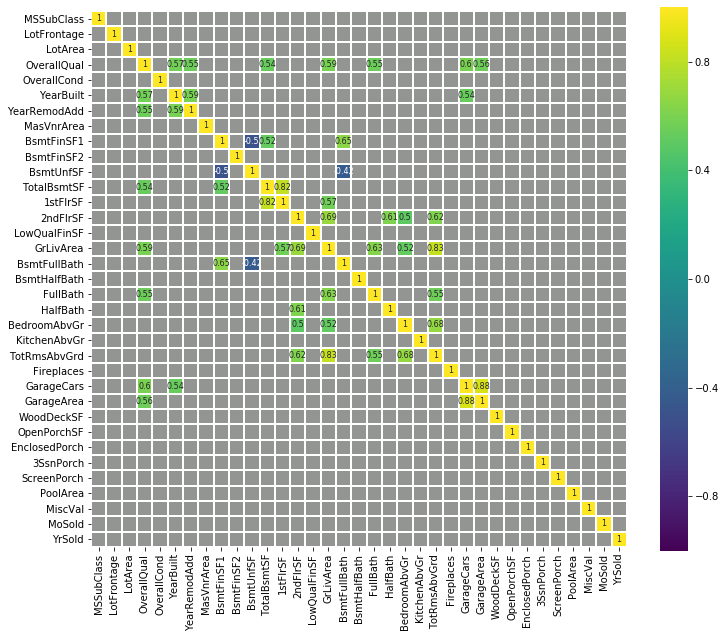

In [117]:
corr = df_num.drop('SalePrice', axis=1).corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1,
            annot=True, annot_kws={"size": 8}, square=True).set_facecolor('xkcd:grey');

In [119]:
# Get non-numeric features

df_not_num = train.select_dtypes(include = ['O'])

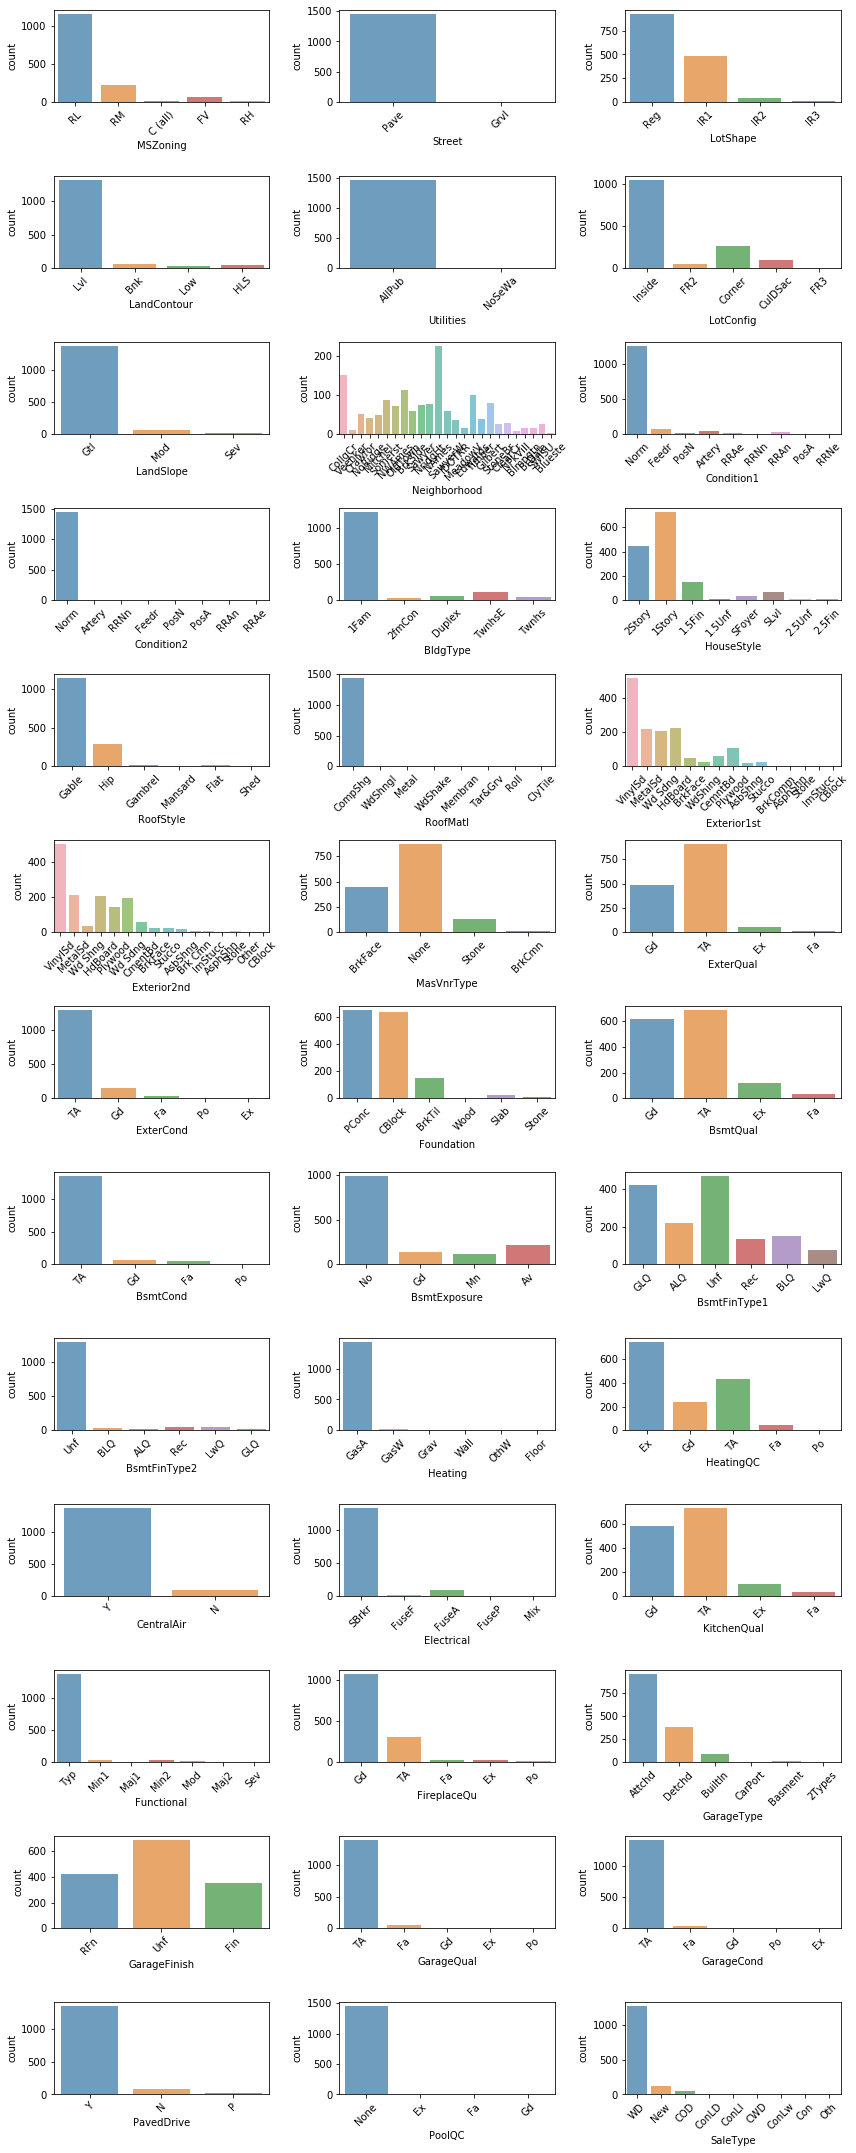

In [138]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

In [143]:
feature_list1 = list(df_not_num.columns)

In [145]:
excluded_features = ['GarageCond', 'Functional', 'Heating', 'BsmtFinType2', 'RoofMatl', 'Street', 'Utilities']

for item in excluded_features:
    feature_list1.remove(item)

In [155]:
# Combine both feature lists

all_feature_list = list(feature_list.index)

all_feature_list.extend(feature_list1)

In [157]:
train = train[all_feature_list]

test = test[all_feature_list]